Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 128)          640000    
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                      

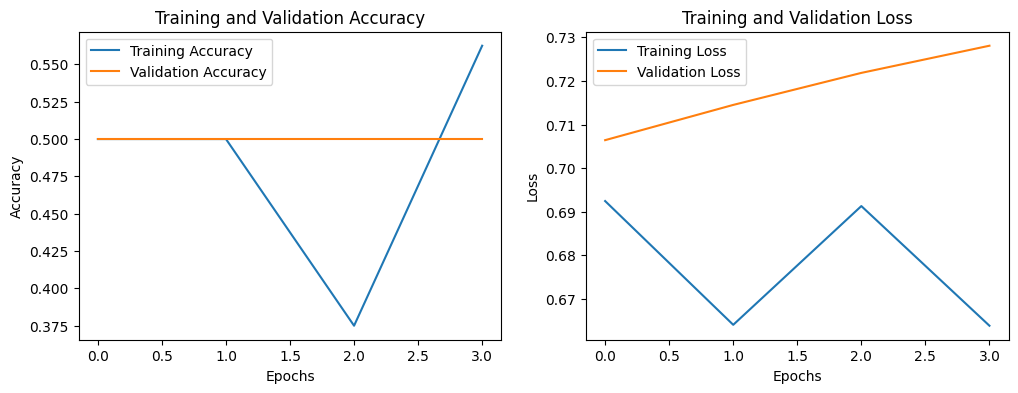

1/1 [==============================] - 0s 123ms/step
Komentar: 'saya sangat suka produknya.'
Prediksi Sentimen: Negatif (Confidence: 0.5344)


In [2]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Data teks dengan 50 komentar negatif dan positif
data = {
    'text': [
        "Pelayanan di toko ini sangat memuaskan.",
        "Barang yang saya terima sesuai dengan deskripsi.",
        "Pengiriman cepat dan aman.",
        "Produk berkualitas tinggi dan tahan lama.",
        "Harga sangat bersaing dibandingkan toko lain.",
        "Pelayanannya ramah dan sangat membantu.",
        "Sangat puas dengan pengalaman belanja saya di sini.",
        "Produk ini sangat nyaman digunakan.",
        "Rekomendasi produk dari penjual sangat bermanfaat.",
        "Saya pasti akan kembali berbelanja di sini lagi.",
        "Pengiriman sangat lambat dan mengecewakan.",
        "Barang yang saya terima rusak.",
        "Kualitas produk tidak sesuai dengan harganya.",
        "Pelayanan pelanggan sangat buruk.",
        "Deskripsi produk menyesatkan.",
        "Sangat tidak puas dengan belanja di sini.",
        "Produk tidak nyaman digunakan.",
        "Harga terlalu mahal untuk kualitas yang diberikan.",
        "Barang yang saya terima berbeda dari yang diiklankan.",
        "Pelayanan di toko ini sangat mengecewakan."
    ],
    'label': [
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    ]
}
df = pd.DataFrame(data)

# Pra-pemrosesan teks
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['text'])
X = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(X, maxlen=100)
y = df['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model CNN dengan dropout
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))  # Mengurangi jumlah filter
model.add(GlobalMaxPooling1D())
model.add(Dense(units=10, activation='relu'))
model.add(Dropout(0.5))  # Dropout dengan rate 50%
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Callback early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Pelatihan model
history = model.fit(X_train, y_train, epochs=25, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

# Menampilkan grafik akurasi
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Menampilkan grafik loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Menambahkan komentar baru
new_comment = "saya sangat suka produknya."

# Pra-pemrosesan teks untuk komentar baru
X_new = tokenizer.texts_to_sequences([new_comment])
X_new = pad_sequences(X_new, maxlen=100)

# Melakukan prediksi dengan model
prediction = model.predict(X_new)

# Mengambil label prediksi
predicted_label = "Positif" if prediction[0][0] >= 0.5 else "Negatif"
confidence = prediction[0][0] if predicted_label == "Positif" else 1 - prediction[0][0]

# Menampilkan hasil prediksi
print(f"Komentar: '{new_comment}'")
print(f"Prediksi Sentimen: {predicted_label} (Confidence: {confidence:.4f})")
